In [1]:
from functools import lru_cache
from math import factorial as fact
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

$ p(\alpha, k) $ - propability of picking $\alpha (/5)$ numbers by $k (/90)$ picked numbers

In [2]:
@lru_cache(maxsize=None)
def p(a, k):
    if (a, k) == (0, 0):
        return 1
    if k == 0 or a > k:
        return 0
    if a == 0:
        if k <= 85:
            return fact(85) * fact(90 - k) / (fact(90) * fact(85 - k))
        else:
            return 0
    return p(a - 1, k - 1) * (6 - a) / (91 - k) + p(a, k - 1) * (1-(5-a)/(91-k))

values of $ p(\alpha,k) $

In [3]:
p_values = np.array([[p(a,k) for a in range(6)] for k in range(91)])

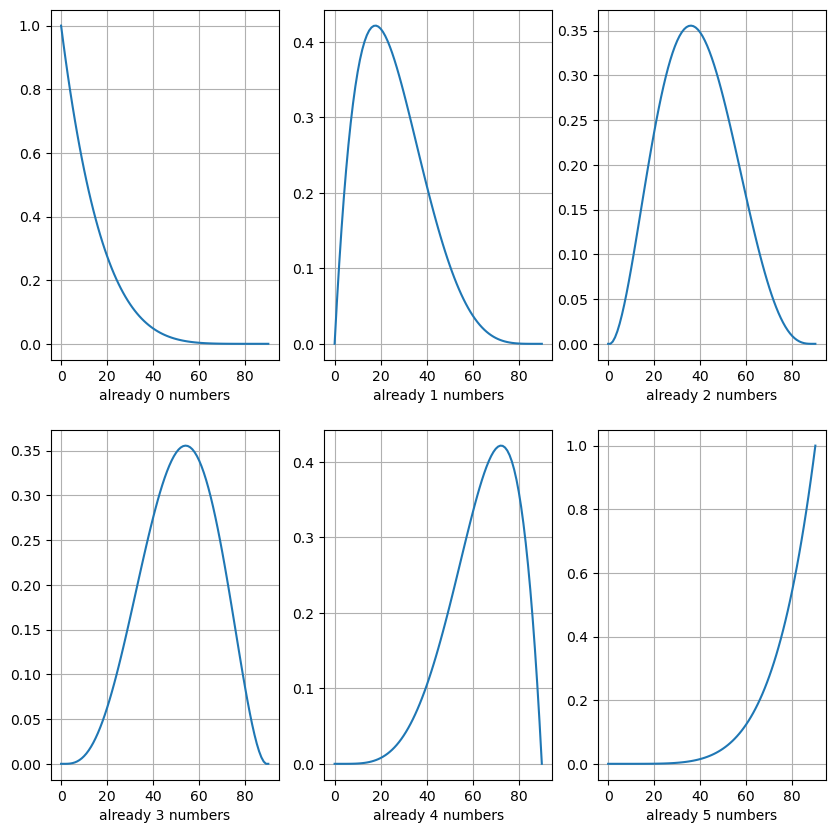

In [4]:
fig , ax = plt.subplots(2,3, figsize=(10,10))
for xy in np.ndindex(2,3):
    i = 3*xy[0]+xy[1]
    ax[xy[0],xy[1]].plot(np.arange(91), p_values[:,i])
    ax[xy[0],xy[1]].set_xlabel(f"already {i} numbers")
    ax[xy[0],xy[1]].grid(True)
plt.show()

density of length of the game

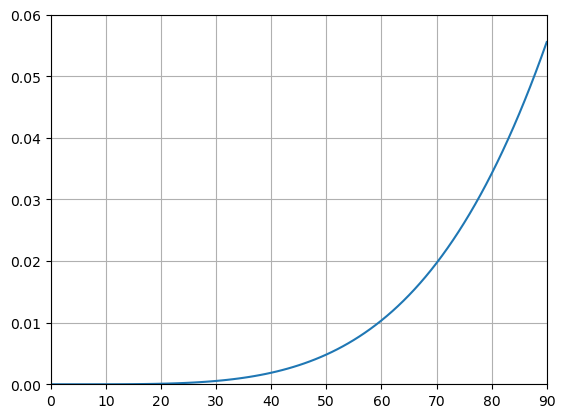

In [5]:
density = np.array([0 if i == 0 else p_values[i][5]-p_values[i-1][5] for i in range(91)])
plt.plot(np.arange(91),density)
plt.grid()
plt.xlim(0,90)
plt.ylim(0,0.06)
plt.show()

In [6]:
np.arange(91).dot(density)

75.83333333333337

In [7]:
bag = np.arange(1,91)
def monte_carlo(line_size=5):
    global bag
    line = np.random.choice(bag,size=line_size, replace=False)
    current_bag = np.random.permutation(bag)
    return 1+max(np.where(current_bag == item)[0][0] for item in line)
    

In [8]:
monte_carlo_values = [monte_carlo() for i in range(100000)]

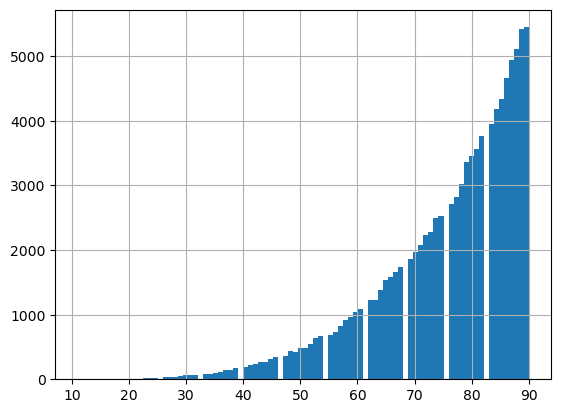

In [9]:
plt.hist(monte_carlo_values, bins=90)
plt.grid()
plt.show()

In [10]:
independent_pairs = np.array([min(monte_carlo(),monte_carlo()) for i in range(10)])

In [11]:
independent_pairs.mean()

66.1

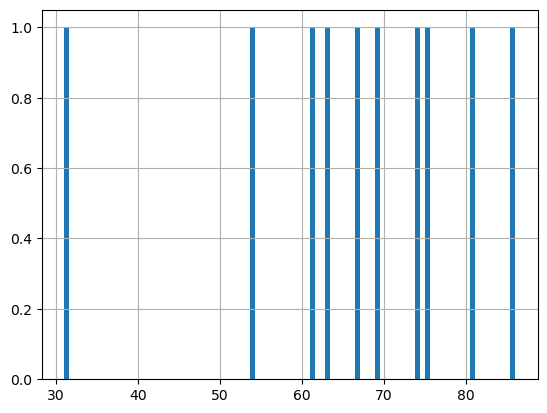

In [12]:
plt.hist(independent_pairs , bins=90)
plt.grid()
plt.show()

In [13]:
def paired_monte_carlo():
    global bag
    line = np.random.choice(bag,size=9, replace=False)
    line1 = line[:5]
    line2 = line[4:]
    current_bag = np.random.permutation(bag)
    return min(
        1+max(np.where(current_bag == item)[0][0] for item in line1),
        1+max(np.where(current_bag == item)[0][0] for item in line2),
    )

In [14]:
dependent_pairs = np.array([paired_monte_carlo() for i in range(10)])

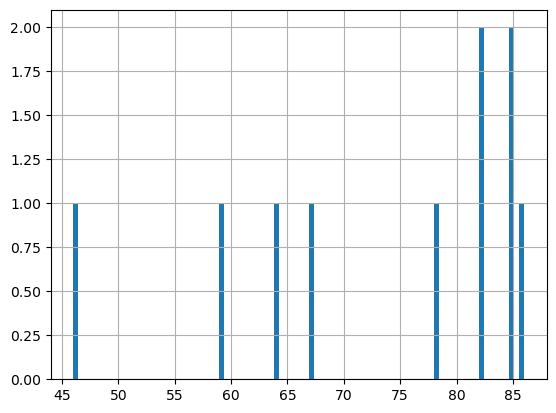

In [15]:
plt.hist(dependent_pairs, bins=90)
plt.grid()
plt.show()

In [16]:
dependent_pairs.mean()

73.4

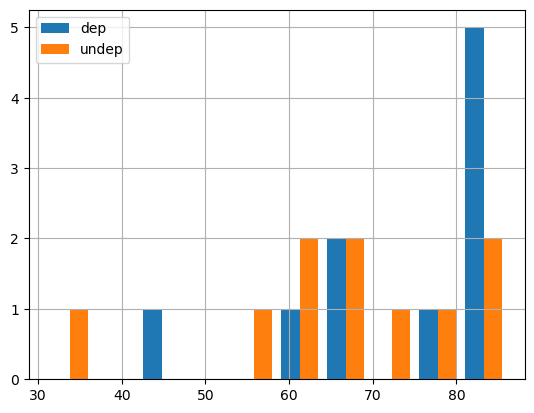

In [17]:
plt.hist([dependent_pairs, independent_pairs],label=('dep','undep'))
plt.legend()
plt.grid()
plt.show()

In [18]:
from scipy.stats import mannwhitneyu, ttest_ind

In [19]:
df = pd.DataFrame({'dep':dependent_pairs,'indep':independent_pairs})

In [20]:
df

,dep,indep
0,64,67
1,67,74
2,82,31
3,46,61
4,59,63
5,82,86
6,78,75
7,86,81
8,85,69
9,85,54


In [21]:
mannwhitneyu(df['dep'],df['indep'])

MannwhitneyuResult(statistic=65.0, pvalue=0.2723141220596529)

In [22]:
ttest_ind(df['dep'],df['indep'], equal_var=True)

TtestResult(statistic=1.113628106129659, pvalue=0.2800892763740337, df=18.0)

In [23]:
def triple_2_monte_carlo():
    global bag
    line = np.random.choice(bag,size=14, replace=False)
    line1 = line[:5]
    line2 = line[4:9]
    line3 = line[9:]
    current_bag = np.random.permutation(bag)
    return min(
        1+max(np.where(current_bag == item)[0][0] for item in line_item)
        for line_item in [line1,line2,line3]
    )

def triple_3_monte_carlo():
    global bag
    line = np.random.choice(bag,size=13, replace=False)
    line1 = line[:5]
    line2 = line[4:9]
    line3 = np.append(line[9:],line[4])
    current_bag = np.random.permutation(bag)
    return min(
        1+max(np.where(current_bag == item)[0][0] for item in line_item)
        for line_item in [line1,line2,line3]
    )

In [24]:
triples = np.array([min(monte_carlo(),monte_carlo(),monte_carlo()) for i in range(100000)])

In [25]:
triples_2 = np.array([triple_2_monte_carlo() for i in range(100000)])

In [26]:
triples_3 = np.array([triple_3_monte_carlo() for i in range(100000)])

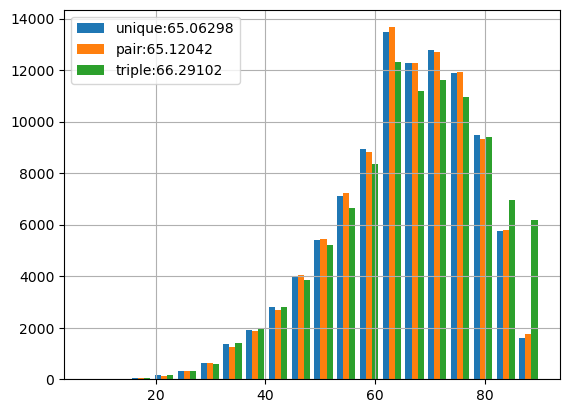

In [27]:
plt.hist([triples,triples_2,triples_3], label=(f"unique:{triples.mean()}",f"pair:{triples_2.mean()}",f"triple:{triples_3.mean()}"), bins=20)
plt.grid()
plt.legend()
plt.show()

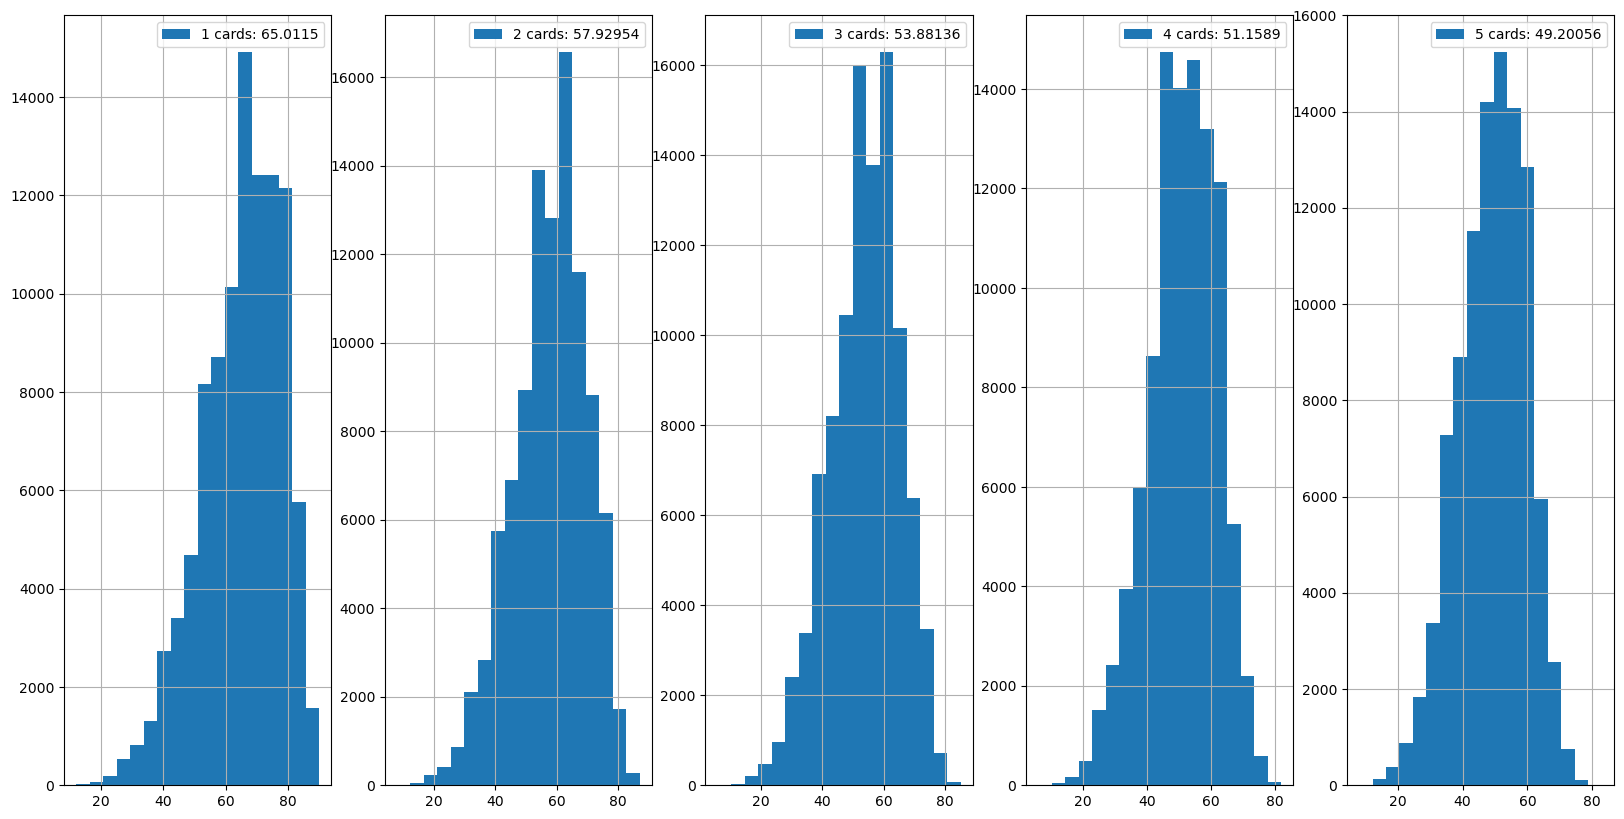

In [28]:
fig, ax = plt.subplots(1,5,figsize=(20,10))
for i in range(1,6):
    data = np.array([np.min(np.array([monte_carlo() for i in range(3*i)])) for j in range(100000)])
    ax[i-1].hist(data, label=f"{i} cards: {data.mean()}", bins=18)
    ax[i-1].legend()
    ax[i-1].grid()
plt.show()

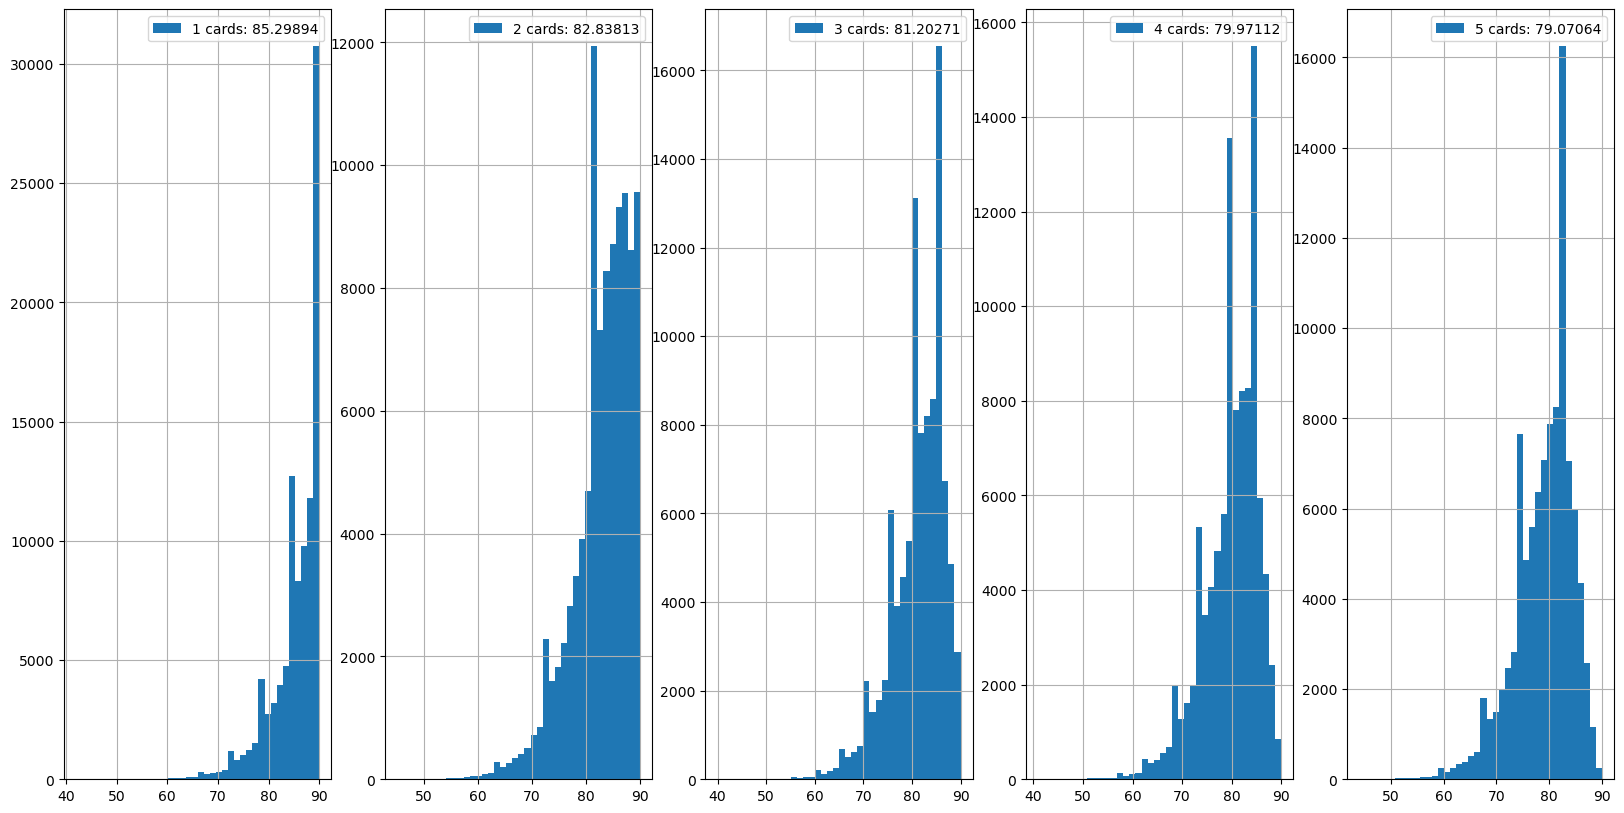

In [29]:
fig, ax = plt.subplots(1,5,figsize=(20,10))
for i in range(1,6):
    data = np.array([np.min(np.array([monte_carlo(line_size=15) for i in range(i)])) for j in range(100000)])
    ax[i-1].hist(data, label=f"{i} cards: {data.mean()}",bins=40)
    ax[i-1].legend()
    ax[i-1].grid()
plt.show()